In [1]:
import utils
import skimage
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def remove_noise(im: np.ndarray) -> np.ndarray:
    """
        A function that removes noise in the input image.
        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=bool)
        return:
            (np.ndarray) of shape (H, W). dtype=bool
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # Apply an erosion to remove noisy outliers (this operation shrinks the size of the object)
    erosion_radius = 7
    erosion_structuring_element = skimage.morphology.disk(erosion_radius)
    im_eroded = skimage.morphology.binary_erosion(im, erosion_structuring_element)

    # Apply a dilation to the eroded image to fill the holes derived from the eriosion operation
    dilation_radius = 13
    dilation_structuring_element = skimage.morphology.disk(dilation_radius)
    im_dilated = skimage.morphology.binary_dilation(im_eroded, dilation_structuring_element)
    
    # Apply another erosion to the dilated image to balance the effect of morphology operations
    # on the object size
    morph_radius_diff = abs(erosion_radius - dilation_radius)
    morph_diff_structuring_element = skimage.morphology.disk(morph_radius_diff)
    im_final = skimage.morphology.binary_erosion(im_dilated, morph_diff_structuring_element)

    # Visualize the transformation
    fig, axis = plt.subplots(1,4, figsize=(20,5))
    axis[0].imshow(im, cmap="gray")
    axis[0].set_title("Given Image")
    axis[0].axis("off")
    axis[1].imshow(im_eroded, cmap="gray")
    axis[1].set_title("Eroded Image")
    axis[1].axis("off")
    axis[2].imshow(im_dilated, cmap="gray")
    axis[2].set_title("Dilated Image")
    axis[2].axis("off")
    axis[3].imshow(im_final, cmap="gray")
    axis[3].set_title("Final Image after another Erosion")
    axis[3].axis("off")
    plt.savefig("image_processed/task3a.png")

    # Update the im
    im = im_final

    return im
    ### END YOUR CODE HERE ###

Reading image: images/noisy.png
Saving image to: image_processed/noisy-filtered.png


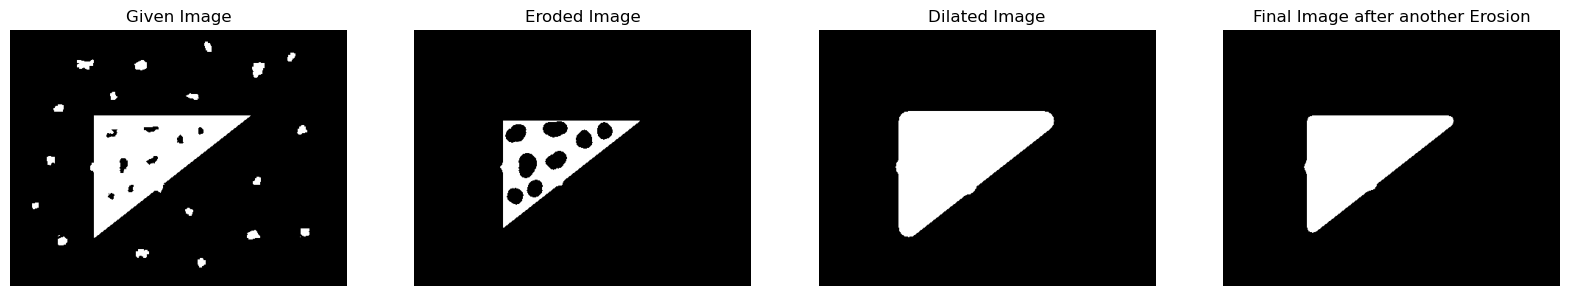

In [3]:
if __name__ == "__main__":
    # DO NOT CHANGE
    im = utils.read_image("noisy.png")

    binary_image = (im != 0)
    noise_free_image = remove_noise(binary_image)

    assert im.shape == noise_free_image.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, noise_free_image.shape)
    assert noise_free_image.dtype == bool, "Expected resulting image dtype to be bool. Was: {}".format(
            noise_free_image.dtype)

    noise_free_image = utils.to_uint8(noise_free_image)
    utils.save_im("noisy-filtered.png", noise_free_image)